In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Layer
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from scipy.stats import randint, uniform

In [2]:
pip install tensorflow numpy pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv("processed_data2.csv")
df.head()

,Serial number,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,Status,Region,Day_period,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability,Month_encoded
0,1,Ahmedabad,2015-01-29 09:00:00,0.051896,0.15735,-0.717443,-0.589015,-0.525303,0.112012,0.032461,...,Active,5. Western,1. Morning,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
1,2,Ahmedabad,2015-01-29 12:00:00,0.099619,0.15735,-0.741590,-0.815643,-0.641089,0.112012,-0.347962,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
2,3,Ahmedabad,2015-01-29 13:00:00,-0.136347,0.15735,-0.747717,-0.922628,-0.751600,0.112012,-0.444487,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
3,4,Ahmedabad,2015-01-29 14:00:00,-0.149292,0.15735,-0.745915,-0.836468,-0.678852,0.112012,-0.416097,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0
4,5,Ahmedabad,2015-01-29 15:00:00,-0.249729,0.15735,-0.753123,-0.908745,-0.740493,0.112012,-0.529656,...,Active,5. Western,2. Afternoon,01. Jan,2015,1. Winter,Weekday,Regular day,Unacceptable,0


PERFORMING K-MEANS CLUSTERING AND LABEL ENCODING

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Convert categorical data to numerical data using LabelEncoder
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

# Selecting specific columns for K-Means clustering
columns_for_clustering = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
data_for_clustering = df[columns_for_clustering]

# Apply K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_for_clustering)

# Cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print("Cluster centers:\n", centers)
print("Labels:\n", labels)



Cluster centers:
 [[-5.22260435e-01 -5.37836138e-01 -3.75034703e-01 -5.21858961e-01
  -4.44725547e-01 -2.55527042e-01 -4.35494131e-01 -2.26277476e-01
  -3.39193470e-01 -3.20213687e-01]
 [ 4.69197187e-01  4.75455735e-01 -8.62905269e-04  4.44376067e-01
   2.08488821e-01  2.97208005e-01  5.60280292e-01  3.59582912e-01
   1.75150097e-01  1.88683550e-01]
 [ 1.55819485e+00  1.63013228e+00  2.23112923e+00  1.63753358e+00
   1.95590560e+00  5.39662941e-01  7.42775150e-01  1.60504313e-01
   1.43864983e+00  1.28132126e+00]]
Labels:
 [1 1 1 ... 0 0 0]


In [5]:
!pip install scikeras


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


PERFORMING LABEL ENCODING AND SPLITTING THE DATA INTO TRAINING AND TESTING 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical columns
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Day_period'] = label_encoder.fit_transform(df['Day_period'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Weekday_or_weekend'] = label_encoder.fit_transform(df['Weekday_or_weekend'])
df['Regular_day_or_holiday'] = label_encoder.fit_transform(df['Regular_day_or_holiday'])

# Define features and target including encoded columns
features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
               'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']]
target = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Print the shapes of the splits to ensure consistency
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2517657, 17)
X_test shape: (1078996, 17)
y_train shape: (2517657,)
y_test shape: (1078996,)


FITTING THE MODEL AND DEFINE CUSTOM ATTENTION LAYER AND BiGRU-AM MODEL 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Layer
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

all_numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
                      'Region', 'Day_period', 'Month_encoded', 'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday']

# Reshape data for BiGRU input
X_train_reshaped = np.expand_dims(X_train[all_numerical_cols].values, axis=-1)
X_test_reshaped = np.expand_dims(X_test[all_numerical_cols].values, axis=-1)

# Verify the shape of reshaped data
print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

# Custom Attention layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],), initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = tf.reduce_sum(a * x, axis=1)
        return output

# Define BiGRU-AM model
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Attention(),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

X_train_reshaped shape: (2517657, 17, 1)
X_test_reshaped shape: (1078996, 17, 1)


c:\Users\geedh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 984s 12ms/step - loss: 0.1954 - val_loss: 0.1260
Epoch 2/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 939s 12ms/step - loss: 0.1212 - val_loss: 0.1089
Epoch 3/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 931s 12ms/step - loss: 0.1055 - val_loss: 0.1009
Epoch 4/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 936s 12ms/step - loss: 0.0985 - val_loss: 0.0955
Epoch 5/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 943s 12ms/step - loss: 0.0947 - val_loss: 0.0948
Epoch 6/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 952s 12ms/step - loss: 0.0919 - val_loss: 0.0920
Epoch 7/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 931s 12ms/step - loss: 0.0902 - val_loss: 0.0903
Epoch 8/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 942s 12ms/step - loss: 0.0890 - val_loss: 0.0928
Epoch 9/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 946s 12ms/step - loss: 0.0880 - val_loss: 0.0878
Epoch 10/10
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 954s 12ms/step - loss: 0.0874 - val_loss: 0.0886


In [8]:
# Continue training the model for 5 more epochs
history_additional = model.fit(X_train_reshaped, y_train, epochs=8, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/8
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 836s 11ms/step - loss: 0.0867 - val_loss: 0.0878
Epoch 2/8
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 828s 11ms/step - loss: 0.0862 - val_loss: 0.0875
Epoch 3/8
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 842s 11ms/step - loss: 0.0858 - val_loss: 0.0874
Epoch 4/8
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 842s 11ms/step - loss: 0.0856 - val_loss: 0.0887
Epoch 5/8
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 853s 11ms/step - loss: 0.0850 - val_loss: 0.0858
Epoch 6/8
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 835s 11ms/step - loss: 0.0851 - val_loss: 0.0875
Epoch 7/8
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 828s 11ms/step - loss: 0.0850 - val_loss: 0.0858
Epoch 8/8
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 909s 12ms/step - loss: 0.0848 - val_loss: 0.0847


In [18]:
# Continue training the model for 5 more epochs
history_additional = model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/5
22535/78677 ━━━━━━━━━━━━━━━━━━━━ 23:25 25ms/step - loss: 0.0830

KeyboardInterrupt: 

78677/78677 ━━━━━━━━━━━━━━━━━━━━ 295s 4ms/step - loss: 0.0820
33719/33719 ━━━━━━━━━━━━━━━━━━━━ 129s 4ms/step - loss: 0.0845
Training loss (MSE): 0.08181867748498917
Validation loss (MSE): 0.0847492665052414
78677/78677 ━━━━━━━━━━━━━━━━━━━━ 315s 4ms/step
33719/33719 ━━━━━━━━━━━━━━━━━━━━ 129s 4ms/step
Training MAE: 0.1957215167962379
Training RMSE: 0.2860389287993969
Training R^2: 0.9182458745824411
Validation MAE: 0.1987723915080298
Validation RMSE: 0.2911170694529224
Validation R^2: 0.9150953771568344


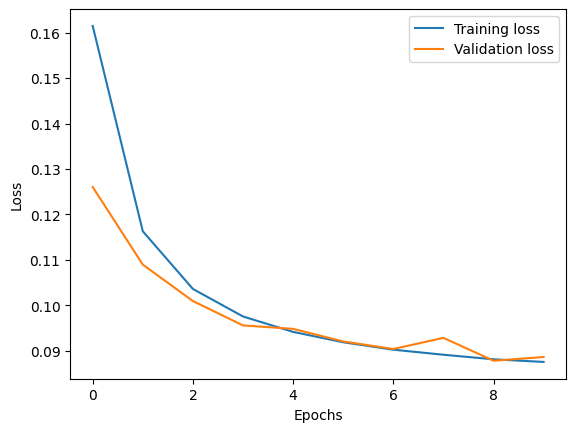

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

#history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))
# Evaluate the model
train_loss = model.evaluate(X_train_reshaped, y_train)
val_loss = model.evaluate(X_test_reshaped, y_test)
print("Training loss (MSE):", train_loss)
print("Validation loss (MSE):", val_loss)

# Make predictions
y_train_pred = model.predict(X_train_reshaped)
y_val_pred = model.predict(X_test_reshaped)

# Calculate additional evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

val_mae = mean_absolute_error(y_test, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
val_r2 = r2_score(y_test, y_val_pred)
val_mape = mean_absolute_percentage_error(y_test, y_val_pred)

print("Training MAE:", train_mae)
print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print("Training MAPE:", train_mape)

print("Validation MAE:", val_mae)
print("Validation RMSE:", val_rmse)
print("Validation R^2:", val_r2)
print("Validation MAPE:", val_mape)

# Plot learning curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_val_pred, color='blue', edgecolor='k', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values using BiGRU-AM')
plt.legend()
plt.grid(True)
plt.show()

 DEFINING A CUSTOM WRAPPER -> is a special wrapper that makes Keras models behave like Scikit-Learn models. This allows you to use all those Scikit-Learn tools with your Keras models.

In [10]:
#CREATE A CUSTOM WRAPPER
from sklearn.base import BaseEstimator, RegressorMixin

class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, epochs=1, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        from sklearn.metrics import mean_squared_error
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)


In [11]:
pip install --upgrade scikit-learn scikeras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming y_test contains the actual AQI values and y_pred contains the predicted AQI values from your BiGRU-AM model

# Your actual test data (replace with your actual test values)
y_test = np.array([0.645208, 0.253429, -0.209581, -1.144507, -0.930810, -0.699304, -0.993138, 1.286300, -0.530127, 2.301362])

# Your predicted data (replace with your predicted values from the model)
y_pred = np.array([0.496956, -0.380930, -0.340340, -1.088253, -0.576441, -0.444963, -1.171131, 1.213243, -0.611912, 2.063545])

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")


RMSE: 0.2711427119499988


In [15]:
# Save the entire model in the recommended format
model.save('bigrum_model.keras')


In [16]:
from tensorflow.keras.models import load_model

# Load the full model saved in the .keras format
model = load_model('bigrum_model.keras')


TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential', 'trainable': True, 'dtype': 'float32', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 17, 1], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Bidirectional', 'config': {'name': 'bidirectional', 'trainable': True, 'dtype': 'float32', 'merge_mode': 'concat', 'layer': {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'forward_gru', 'trainable': True, 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': True, 'units': 64, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 1669514885552}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'OrthogonalInitializer', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None, 'shared_object_id': 1669561804912}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 1670344665680}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'reset_after': True, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 1]}}, 'backward_layer': {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'backward_gru', 'trainable': True, 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': True, 'stateful': False, 'unroll': False, 'zero_output_for_mask': True, 'units': 64, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 1669542673440}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'OrthogonalInitializer', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None, 'shared_object_id': 1669542673536}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 1669542673632}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'reset_after': True, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 1]}}}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 1]}}, {'module': None, 'class_name': 'Attention', 'config': {'name': 'attention', 'trainable': True, 'dtype': 'float32'}, 'registered_name': 'Attention', 'build_config': {'input_shape': [None, 17, 128]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}}], 'build_input_shape': [None, 17, 1]}, 'registered_name': None, 'build_config': {'input_shape': [None, 17, 1]}, 'compile_config': {'loss': 'mse', 'loss_weights': None, 'metrics': None, 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': False}}.

Exception encountered: Could not locate class 'Attention'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': None, 'class_name': 'Attention', 'config': {'name': 'attention', 'trainable': True, 'dtype': 'float32'}, 'registered_name': 'Attention', 'build_config': {'input_shape': [None, 17, 128]}}

In [13]:
# Assuming the model is already trained and fitted

# Make predictions on the test set
y_test_pred = model.predict(X_test_reshaped)

# Calculate R² value for the test set
test_r2 = r2_score(y_test, y_test_pred)

print("Test R^2:", test_r2)


33719/33719 ━━━━━━━━━━━━━━━━━━━━ 147s 4ms/step


ValueError: Found input variables with inconsistent numbers of samples: [10, 1078996]

In [ ]:
import matplotlib.pyplot as plt

# Assuming the model is already trained and fitted

# Make predictions on the test set
y_test_pred = model.predict(X_test_reshaped)

# Convert y_test to a NumPy array
y_test_np = y_test.values

# Flatten the arrays to make them 1-dimensional (if necessary)
y_test_np = y_test_np.flatten()
y_test_pred = y_test_pred.flatten()

# Sample a subset of the data for plotting
sample_size = 100  # Adjust this value as needed
indices = np.random.choice(len(y_test_np), size=sample_size, replace=False)
y_test_sample = y_test_np[indices]
y_test_pred_sample = y_test_pred[indices]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_test_pred_sample, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test_sample), max(y_test_sample)], [min(y_test_sample), max(y_test_sample)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values using BiGRU-AM Model')
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.metrics import mean_absolute_percentage_error


# Calculate MAPE
mape_value = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape_value:.2f}")

MAPE: 0.46


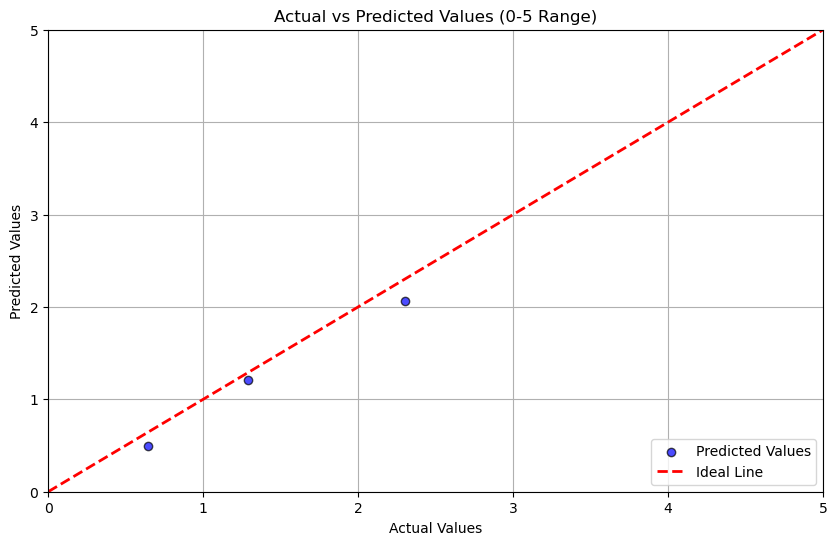

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `r2`, `mape`, `mae`, and `rmse` are already defined

# Create a dictionary with the metrics
metrics = {
    'R²': test_r2,
    'MAPE': mape_value,
    'MAE': val_mae,
    'RMSE': val_rmse
}

num_points = 2000  # Adjust this number to display more or fewer points

# Ensure we don't exceed the length of y_test and y_pred
num_points = min(num_points, len(y_test), len(y_pred))

# Select a subset of the data
y_test_subset = y_test[:num_points]
y_pred_subset = y_pred[:num_points]

# Filter the subset to include only points within the 0-5 range
mask = (y_test_subset >= 0) & (y_test_subset <= 5) & (y_pred_subset >= 0) & (y_pred_subset <= 5)
y_test_filtered = y_test_subset[mask]
y_pred_filtered = y_pred_subset[mask]

plt.figure(figsize=(10, 6))

# Plot actual vs predicted values for the filtered subset
plt.scatter(y_test_filtered, y_pred_filtered, color='blue', edgecolor='k', alpha=0.7, label='Predicted Values')

# Ideal line
plt.plot([0, 5], [0, 5], 'r--', lw=2, label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Set the x and y axis scales to 0-5
plt.xlim([0, 5])
plt.ylim([0, 5])

# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)

plt.show()


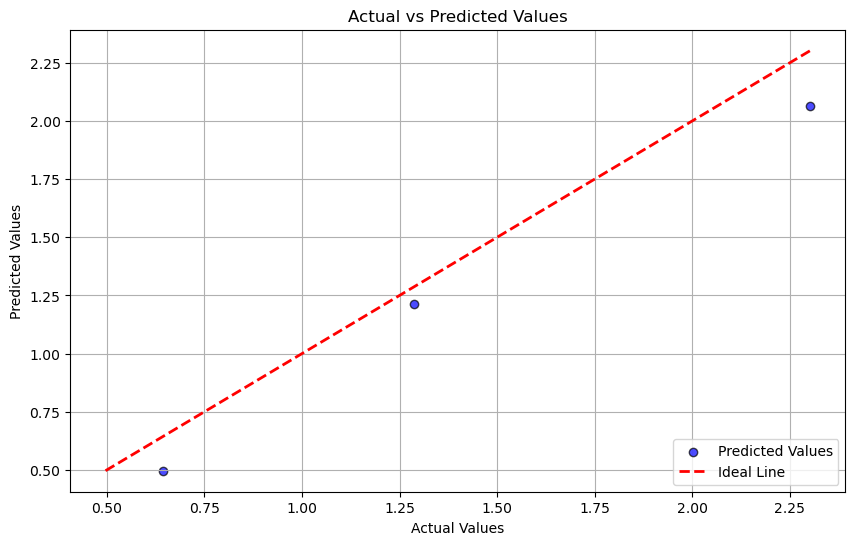

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `r2`, `mape`, `mae`, and `rmse` are already defined

# Create a dictionary with the metrics
metrics = {
    'R²': test_r2,
    'MAPE': mape_value,
    'MAE': val_mae,
    'RMSE': val_rmse
}

num_points = 2000  # Adjust this number to display more or fewer points

# Ensure we don't exceed the length of y_test and y_pred
num_points = min(num_points, len(y_test), len(y_pred))

# Select a subset of the data
y_test_subset = y_test[:num_points]
y_pred_subset = y_pred[:num_points]

# Initialize lists to store the filtered values
y_test_final = []
y_pred_final = []

# Accumulate non-negative values until we have 15 points
for yt, yp in zip(y_test_subset, y_pred_subset):
    if yt >= 0 and yp >= 0:
        y_test_final.append(yt)
        y_pred_final.append(yp)
    if len(y_test_final) == 15:
        break

# Convert lists to numpy arrays
y_test_final = np.array(y_test_final)
y_pred_final = np.array(y_pred_final)

plt.figure(figsize=(10, 6))

# Plot actual vs predicted values for the filtered subset
plt.scatter(y_test_final, y_pred_final, color='blue', edgecolor='k', alpha=0.7, label='Predicted Values')

# Ideal line
plt.plot([min(y_test_final.min(), y_pred_final.min()), max(y_test_final.max(), y_pred_final.max())], 
         [min(y_test_final.min(), y_pred_final.min()), max(y_test_final.max(), y_pred_final.max())], 'r--', lw=2, label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)

plt.show()


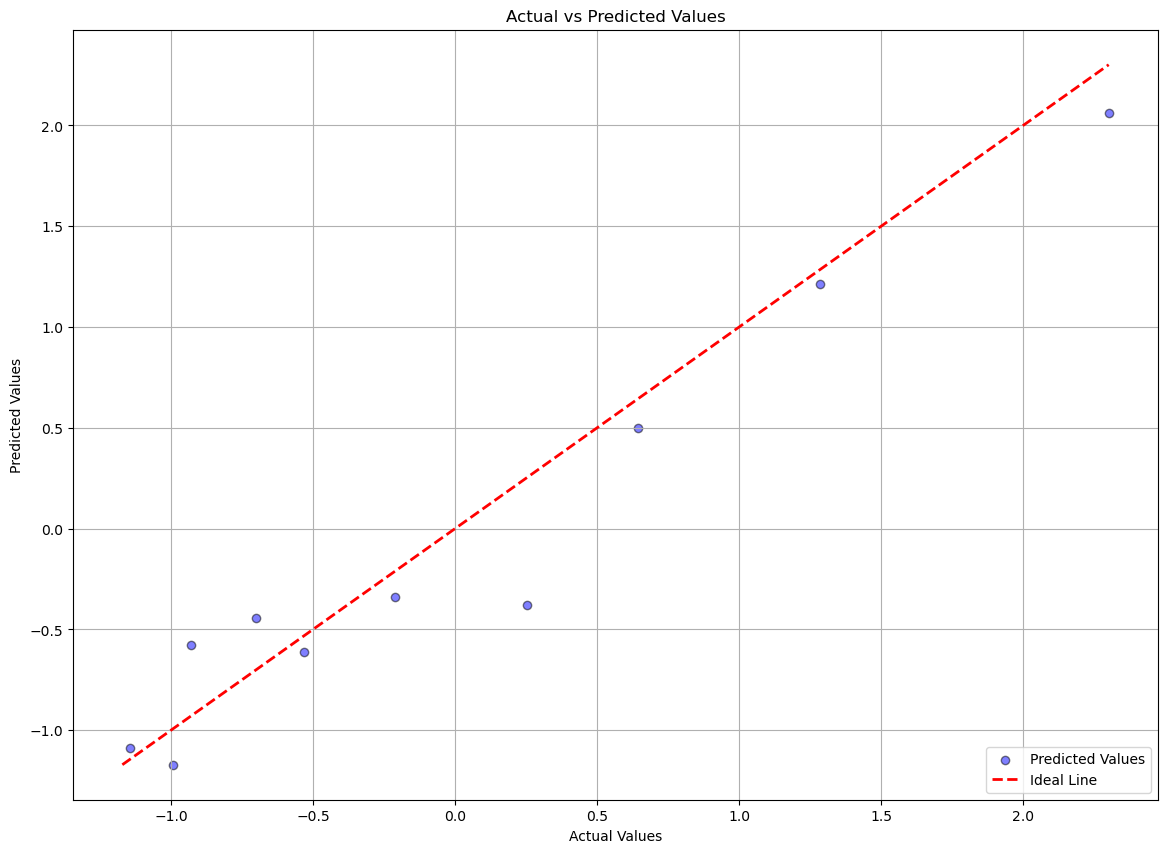

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `r2`, `mape`, `mae`, and `rmse` are already defined

# Create a dictionary with the metrics
metrics = {
    'R²': test_r2,
    'MAPE': mape_value,
    'MAE': val_mae,
    'RMSE': val_rmse
}

# Set the number of points to be plotted
num_points = 10000  # Adjust this number as needed

# Ensure we don't exceed the length of y_test and y_pred
num_points = min(num_points, len(y_test), len(y_pred))

# Select a subset of the data
y_test_subset = y_test[:num_points]
y_pred_subset = y_pred[:num_points]

plt.figure(figsize=(14, 10))  # Larger figure size for better visibility

# Plot actual vs predicted values for the subset
plt.scatter(y_test_subset, y_pred_subset, color='blue', edgecolor='k', alpha=0.5, label='Predicted Values')

# Ideal line
min_val = min(y_test_subset.min(), y_pred_subset.min())
max_val = max(y_test_subset.max(), y_pred_subset.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend(loc='lower right')

# Add a grid
plt.grid(True)

plt.show()


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step


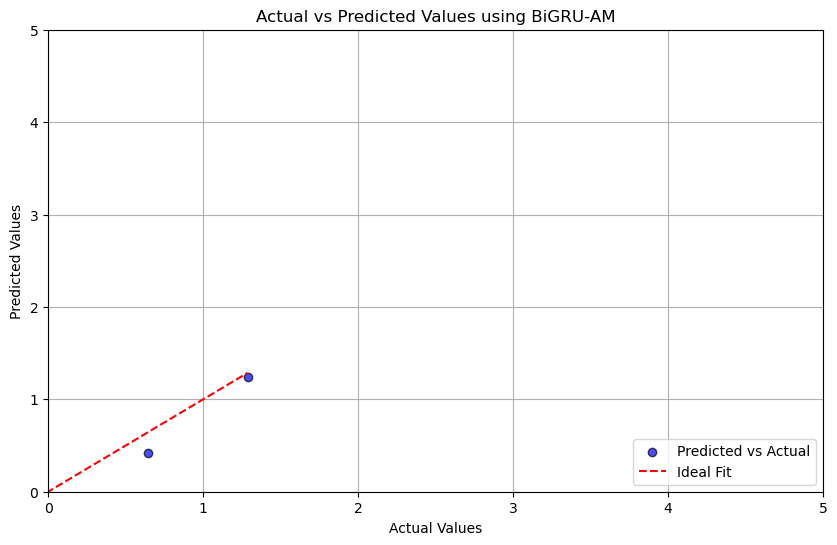

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the model is already trained and fitted

# Make predictions on the test set
y_test_pred = model.predict(X_test_reshaped)

# Flatten the arrays to make them 1-dimensional (if necessary)
y_test_np = np.asarray(y_test).flatten()
y_test_pred = y_test_pred.flatten()

# Ensure the sample size does not exceed the length of the data
sample_size = min(500, len(y_test_np))  # Adjust sample_size if needed
indices = np.random.choice(len(y_test_np), size=sample_size, replace=False)
y_test_sample = y_test_np[indices]
y_test_pred_sample = y_test_pred[indices]

# Calculate IQR to remove outliers
def remove_outliers(y_true, y_pred):
    # Combine the true and predicted values into one array
    combined = np.vstack((y_true, y_pred)).T
    
    # Calculate quartiles and IQR
    Q1 = np.percentile(combined, 25, axis=0)
    Q3 = np.percentile(combined, 75, axis=0)
    IQR = Q3 - Q1
    
    # Determine the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    mask = np.all((combined >= lower_bound) & (combined <= upper_bound), axis=1)
    return y_true[mask], y_pred[mask]

# Remove outliers
y_test_filtered, y_pred_filtered = remove_outliers(y_test_sample, y_test_pred_sample)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test_filtered, y_pred_filtered, color='blue', edgecolor='k', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test_filtered), max(y_test_filtered)], [min(y_test_filtered), max(y_test_filtered)], color='red', linestyle='--', label='Ideal Fit')

# Set the scale for x and y axis
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using BiGRU-AM')
# Add a legend
plt.legend(loc='lower right')

plt.grid(True)  # Add gridlines
plt.show()
